# Highlight the key differences between KDE plots, box plots and violin plots
A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. Unlike box plots and violin plots, KDE can only visualize the shape of a dataset. It doesn't give the statistical information of the dataset such as the mean, median et.c. And also, it is difficult to visualize the shape of multiple dataset with KDE.
A box plot displays the five-number statistical summary of a numerical dataset: the “minimum”, first quartile (25th), median (50th), third quartile (75th), and “maximum”. Box plot also shows the boundaries (“minimum” and “maximum”), and data points beyond the boundaries are considered as outliers. Unlike KDE and Violin plots, the box plot can't give us information about the distribution of the dataset. With box plots, it is easy to plot multiples and compare distributions
A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side. A violin plot is more informative than a plain box plot and KDE. While a box plot only shows summary statistics such as median and interquartile ranges and KDE only shows data distribution, the violin plot shows the full distribution of the data with the statistical summary. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


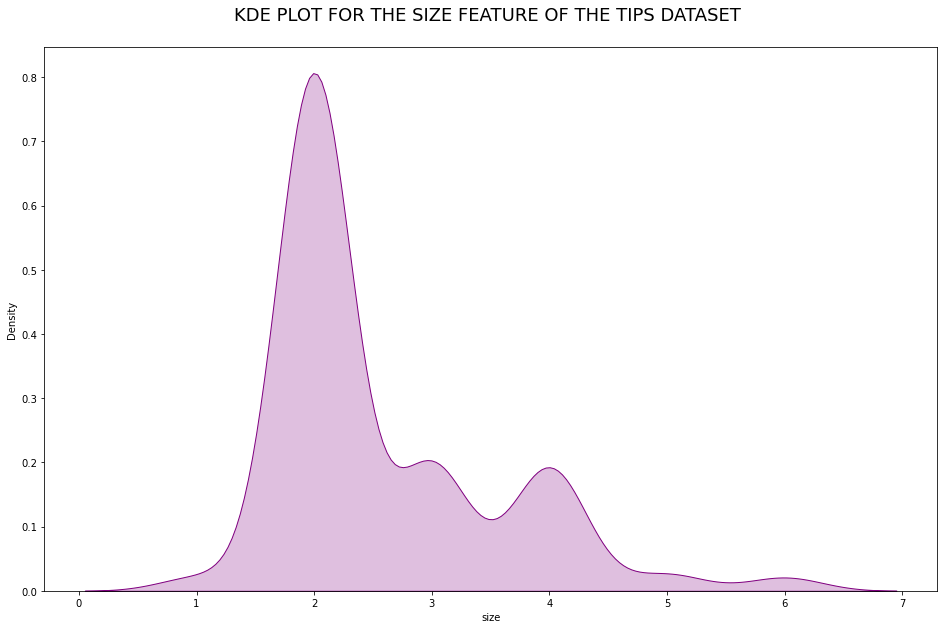

In [14]:
# Generate a KDE plot for the size feature of the tips dataset. Give detailed explanations of your observations
fig = plt.figure(figsize=(16, 10))

sns.kdeplot(data=tips, x="size", shade=True, color='purple')
plt.title("KDE plot for the size feature of the tips dataset \n".upper(), fontdict={'fontsize': 18}, loc='center')

plt.show()

Above, we see a KDE plot for the size feature of the tips dataset. The y-axis is in term of the density. The density curve has multiple peaks indicating the distribution is multimodal(with multiple peaks)

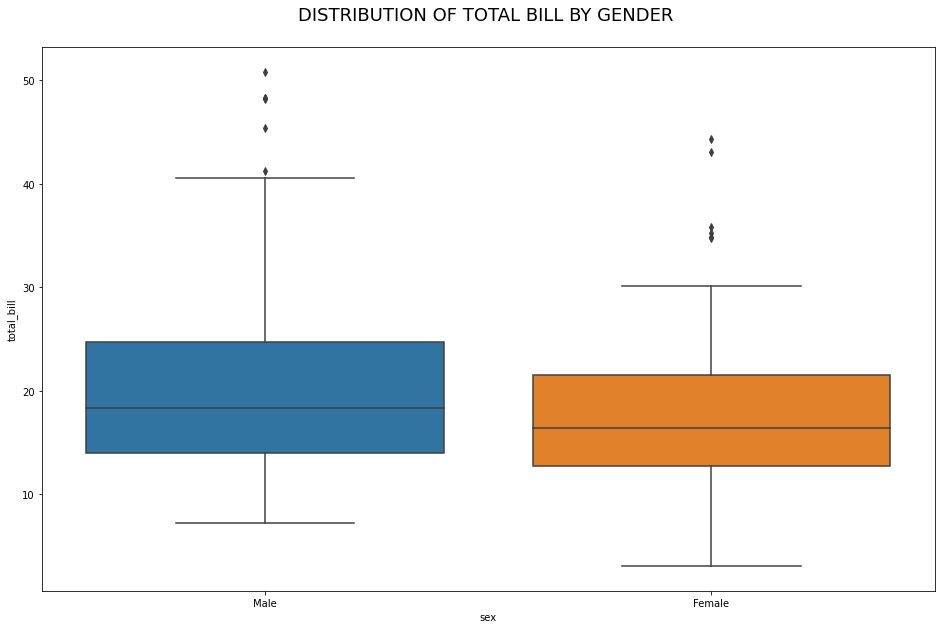

In [15]:
# Using the boxplots, generate the distribution of total bill by gender for the tips dataset.
fig = plt.figure(figsize=(16, 10))

plot = sns.boxplot(x="sex", y="total_bill", data=tips)
plt.title("Distribution of Total Bill by Gender \n".upper(), fontdict={'fontsize': 18}, loc='center')

plt.show()

Above we see a box plot for the total bill by gender. The box plots provides the statistical information of the tota bills for the male and female gender. For the male gender, the lower quartile, median and upper quartile are, respectively, 14.0, 18.5 and 24.5. For the female gender, the corresponding quartiles are 11.5, 16.0 and 21.0. The median total bill as well as the upper and lower quartile of the male gender is more than that of the female gender. The distribution of the two genders is skewed to the right.

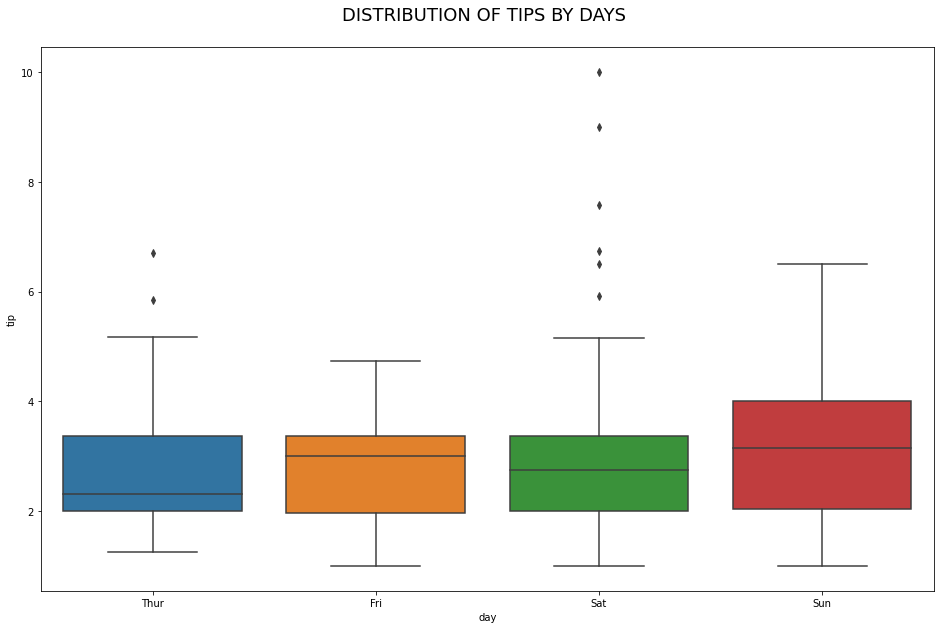

In [16]:
# Using boxplots generate the distribution of tips by days.
fig = plt.figure(figsize=(16, 10))

sns.boxplot(x="day", y="tip", data=tips)
plt.title("Distribution of tips by days \n".upper(), fontdict={'fontsize': 18}, loc='center')

plt.show()

Above we see a box plot for the tips by day. The box plots provides the statistical information of the tips for thursday, friday, saturday and sunday. For thursday, the lower quartile, median and upper quartile are, respectively, 2.0, 2.3 and 3.4. For friday, the corresponding quartiles are 1.9, 2.9 and 3.4. For saturday, the corresponding quartiles are 2.0, 2.6 and 3.4.For Sunday, the corresponding quartiles are 2.0, 3.2 and 4.0. The median tips as well as the upper and lower quartile is highest for sunday. The lower and upper quartiles for thursday, friday and saturday are the same.  The distribution is right skewed for thursday, left skewed for friday and relatively normal for saturday and sunday.

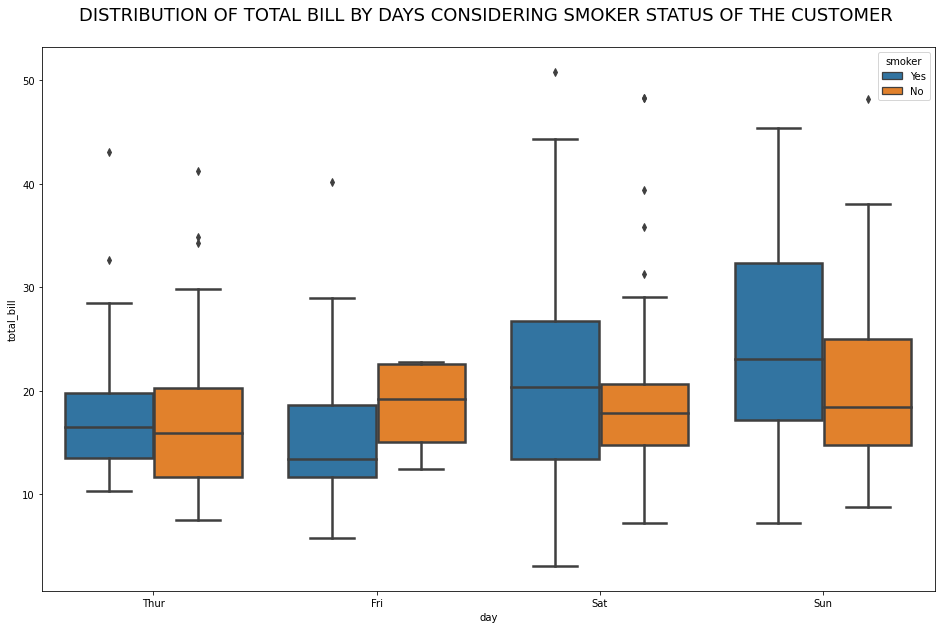

In [17]:
# Using boxplots generate the distribution of total bill by days considering smoker status of the customer.
fig = plt.figure(figsize=(16, 10))

sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, linewidth=2.5)
plt.title("Distribution of Total Bill by Days considering smoker status of the customer \n".upper(), fontdict={'fontsize': 18}, loc='center')

plt.show()

Above we see a box plot for the total bill by day considering whether customers are smokers or not. The box plots provides the statistical information of the total bill for thursday, friday, saturday and sunday considering the smoker status of customer. For thursday, the lower quartile, median and upper quartile for customers that smoke are, respectively, 13.5, 16.5 and 20.0. For customers that don't smoke on thursday, the corresponding values are 11.0, 16.0 and 20.5. For customers that smoke on friday, the corresponding quartiles are 11.0, 13.0 and 19.0. For customers that don't smoke on friday, 15.5, 19.4 and 22.0. For customers that smoke on saturday, the corresponding quartiles are 13.0, 20.2 and 28.0. While for customers that don't smoke on saturday, 14.0, 18.5 and 20.3. For customers that smoke on Sunday, the corresponding quartiles are 19.7, 23.5 and 31.5. For customers that don't smoke on sunday, 14.0, 19.0 and 23.0. The median total bill as well as the upper and lower quartile is highest for customers that smoke on sunday. The median total bill as well as the upper and lower quartile is lowest for customers that smoke on friday.

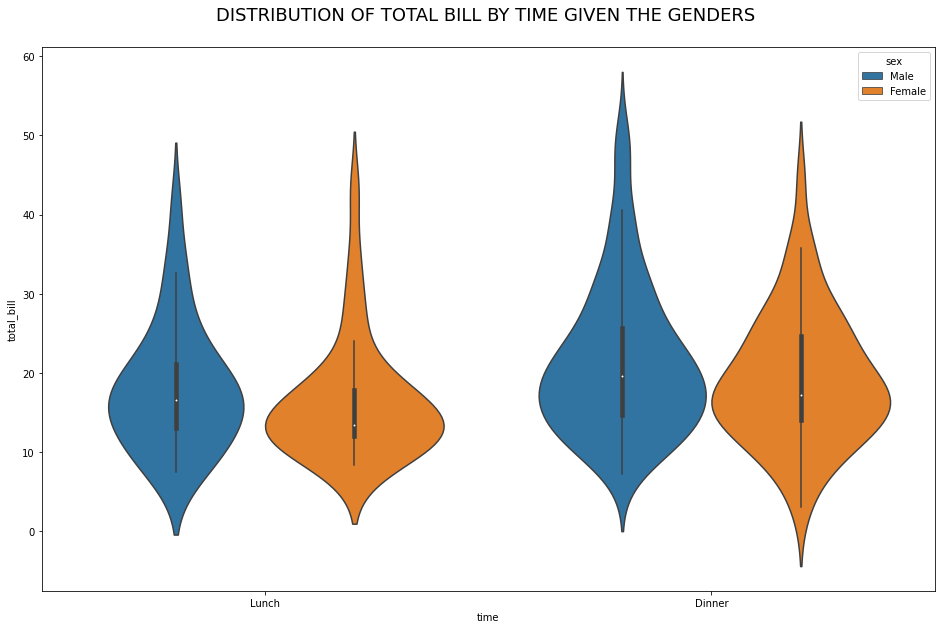

In [20]:
# Using violin plots generate the distribution of total bill by time given the genders. 
fig = plt.figure(figsize=(16, 10))

sns.violinplot(x="time", y="total_bill", hue="sex", data=tips)
plt.title("Distribution of Total Bill by time given the genders \n".upper(), fontdict={'fontsize': 18}, loc='center')

plt.show()

The above violin plot shows the relationship of time to total bill considering the sex of the customers. The box plot elements show the median total bill is generally higher for the male gender for both lunch and dinner and it is the higher for dinner for the two genders.  The shape of the distribution (extremely skinny on each end and wide in the middle) indicates the total bills are highly concentrated around the median.

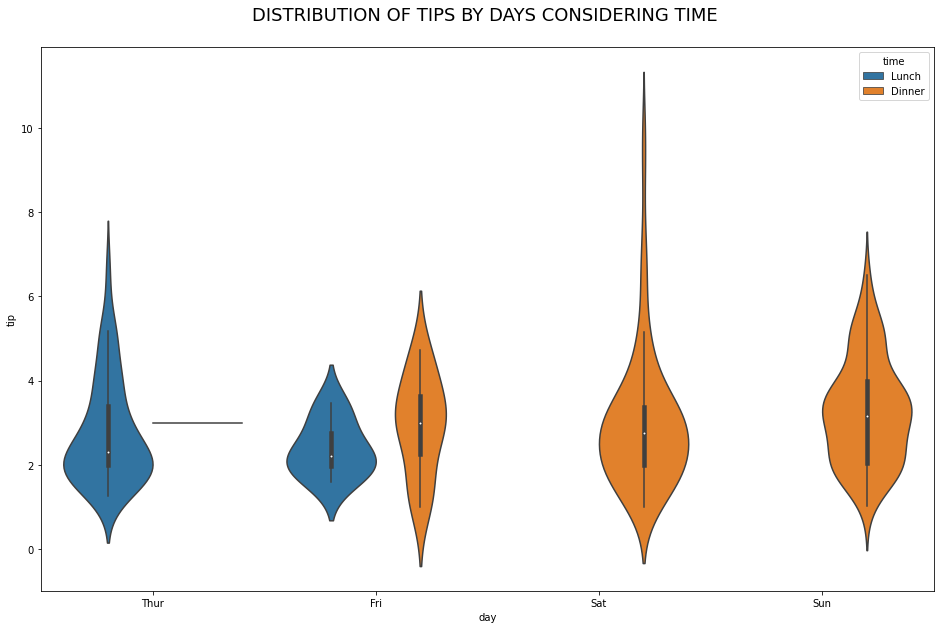

In [21]:
# Using violin plots generate the distribution of tips by days also considering time. 
fig = plt.figure(figsize=(16, 10))

sns.violinplot(x="day", y="tip", hue="time", data=tips)
plt.title("Distribution of tips by days considering time \n".upper(), fontdict={'fontsize': 18}, loc='center')

plt.show()

The grouped violin plot shows no tip was given during lunch on saturday and sunday and very little tip was given on during dinner on thursday . Further, you can draw conclusions that the higest tip was given during dinner on sunday. The median tip is highest during dinner on weekends compared to lunch.

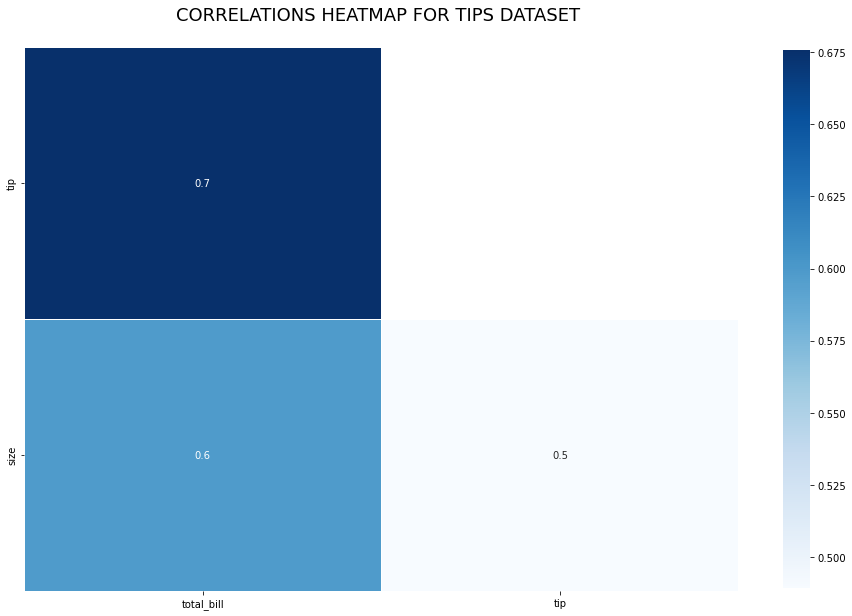

In [13]:
# Plot and customize a correlations heatmap for the tips dataset.
fig = plt.figure(figsize=(16, 10))

corr = tips.corr()
ones = np.ones_like(corr, dtype='bool')
mask = np.triu(ones)
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()

sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", cmap='Blues', linewidths=.9, cbar_kws={'shrink':.99})
plt.title("Correlations Heatmap for Tips Dataset \n".upper(), fontdict={'fontsize': 18}, loc='center')
plt.show()
